In [34]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
# Import data. This data set contains weather data for four cities: San Francisco, Walnut Creek, Santa Barbara,
# San Diego. I recieved current weather data for each city every twenty minutes for approximately 27 days. 

df = pd.read_csv('/Users/ashvets/github/DSCI-6007-S17/Project/weather.csv')

df.head(6)

,city,time,temperature,precipProbability,precipIntensity,pressure,humidity,visibility,ozone,cloudCover,dewPoint
0,SantaBarbara,1492137820,58.13,0.0,0.0,1016.28,0.58,10.00,314.84,0.04,43.50
1,WalnutCreek,1492137820,52.20,0.0,0.0,1020.25,0.61,10.00,346.29,0.18,39.10
2,SanFrancisco,1492137820,52.83,0.0,0.0,1020.63,0.65,10.00,345.56,0.45,41.43
3,SanDiego,1492137821,61.75,0.0,0.0,1016.35,0.79,9.46,304.97,0.50,55.09
4,SanFrancisco,1492139422,52.53,0.0,0.0,1020.76,0.66,10.00,345.73,0.35,41.67
5,SanDiego,1492139422,60.83,0.0,0.0,1016.20,0.80,9.13,304.94,0.69,54.56


In [3]:
# For my ML project I want to see if there is any significant change in the weather between the cities. 
# My plan is to do this by using a classifier and seeing how well my model can determine what city I am in
# given a random data point/test data. 

y = df.city # city names which I will label with integer classifiers to make things easier.

# Time is not a feature that I want to use considering it is one of the two primary keys in my database and is 
# unique each time I make an API call.
X = df.iloc[:, 2:]
y_new = []
for i in range(len(y)):
    if y[i] == 'SanFrancisco':
        y_new.append(1)
    elif y[i] == 'WalnutCreek':
        y_new.append(2)
    elif y[i] == 'SantaBarbara':
        y_new.append(3)
    else:
        y_new.append(4)
# We will need y to be an array
y_new = np.array(y_new)     

Below is a simple statistics plot I used in my data engineering project to visualize my data. I ploted the daily average temperature for each day since I started streaming data. 

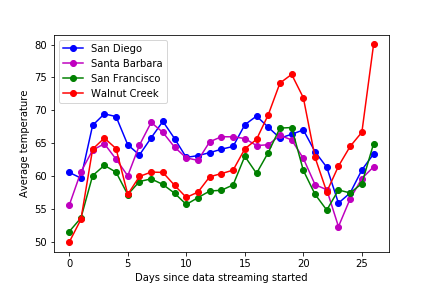

In [4]:
from IPython.display import Image
Image(filename='/Users/ashvets/github/DSCI6003-student/statsplot.png')

In [5]:
# Split my data into train and test portions
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=.2)

At first I am going to attempt applying principal component analysis to my data in order to have only two features so I can do some sort of visualization of my data with SVM. I will also standardize my data before applying PCA.

In [6]:
# Initialize a scaler and fit and transfor the train data. Then use the same scaler to transform the test data.
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test)

# Project my feature space into a 2-dimensional matrix. Once again fit and transform the training data 
# and then transform my test data using the same parameters.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
y_train = np.array(y_train)

In [13]:
# Initialize a support vector classifier and fit the training data to the model. 
# Print the train and test accuracy of the model.
svm = SVC()
svm.fit(X_train_pca, y_train)
train_score = svm.score(X_train_pca, y_train)
test_score = svm.score(X_test_pca, y_test)
print('Train score: %s, Test score: %s' % (train_score, test_score))

Train score: 0.698248407643, Test score: 0.597454256165


My initial attempt at the building a model for my weather data has pretty good results. However, I do not like that there is big gap between my train and test score which implies my model is not so good since it over-fits to my training data. I will now see if I can get better results using Linear Discriminant Analysis to project my feature space into two dimension.

PCA: Attempts to find the orthogonal component axes of maximum variance in data.

LDA: Finds the feature subspace that optimizes class separability.

In [39]:
# Set the wanted number of features and fit and transform the training data. Then transform the test data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_sd, y_train)
X_test_lda = lda.transform(X_test_sd)

In [41]:
# Initialize our SVC model and fit the training data to it. Then print the accuracy for train and test data.
svm = SVC()
svm.fit(X_train_lda, y_train)
train_score = svm.score(X_train_lda, y_train)
test_score = svm.score(X_test_lda, y_test)
print('Train score: %.3f, Test score: %.3f' % (train_score, test_score))

Train score: 0.505, Test score: 0.473


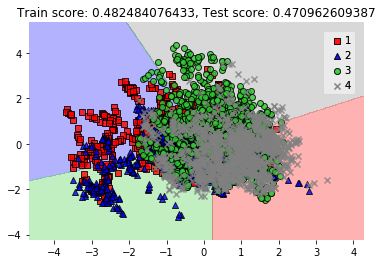

In [42]:
# Although LDA has lower accuracy the model is not over fit to my training data. 
# Lets plot it to have a visualization of what it is doing.

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_lda, y_train)
train_score = svm.score(X_train_lda, y_train)
test_score = svm.score(X_test_lda, y_test)
plot_decision_regions(X_train_lda, y_train, clf=svm)
plt.title('Train score: %s, Test score: %s' % (train_score, test_score))
plt.show()

rbf kernel in sklearn: $K(x, y) = e^{-\gamma * |x - y|^{2}}$

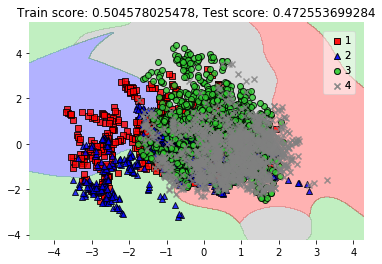

In [44]:
# Now lets see what it would look like with a gaussian (rbf) kernel 

svm = SVC(kernel='rbf', C=1.0, random_state=0)
svm.fit(X_train_lda, y_train)
train_score = svm.score(X_train_lda, y_train)
test_score = svm.score(X_test_lda, y_test)
plot_decision_regions(X_train_lda, y_train, clf=svm)
plt.title('Train score: %s, Test score: %s' % (train_score, test_score))
plt.show()

Using LDA I got less accurate results but the model is not as biased towards the training set and therefor has less variance over all. I will now attempt to apply the SVC to my data with all features present and see if my results improve.

In [16]:
# Re-scale the features and use the entire feature space to fit my SVC model. 
sc = StandardScaler()
X_train_sd = sc.fit_transform(X_train)
X_test_sd = sc.transform(X_test)

In [17]:
# Initialize SVC and fit the entire training data to the model. The output are the parameters.
svm = SVC()
svm.fit(X_train_sd, y_train)
train_score = svm.score(X_train_sd, y_train)
test_score = svm.score(X_test_sd, y_test)
print('Train score: %s, Test score: %s' % (train_score, test_score))

Train score: 0.787818471338, Test score: 0.760540970565


The above results are much better not only because of the overall accuracy score but also because of the small gap between the training and test data scores which indicates that my model does not over-fit to my training data.

Next I want to continue to improve my model by using grid search to tune my hyperparameters. 

In [28]:
# This allows me to standardize the data before I tune my hyperparameters
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=1))])

# List of parameter values for the slack variable and gamma
param_range = [0.1, 1.0, 10.0, 100.0]

# I want to compare two different kernels to see which fits my data better. Both should have soft margins.
param_grid = [{'clf__C': param_range,
               'clf__kernel': ['linear']},
              {'clf__C': param_range,
               'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

# Set accuracy as my scoring metric. 
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

# Run grid search with my un-standardized data
gs = gs.fit(X_train, y_train)

# Print best score seen during grid search and the optimal hyperparameters 
print(gs.best_score_)
print(gs.best_params_)

0.9450636942675159
{'clf__C': 10.0, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'}


In [31]:
# Grid search returned the best score, but lets see how that compares to the scores I get with my test data.
clf = gs.best_estimator_
clf.fit(X_train, y_train)
test_score = clf.score(X_test, y_test)
train_score = clf.score(X_train, y_train)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_score,test_score))

Train accuracy: 0.979, Test accuracy: 0.938


I get a much better result after tuning my hyperparameters! One last step that I can take to improve my result is to use a nested cross-validation to ensure that my model is not over-fitting to my training data.

In [33]:
# Grid search is what optimizes my hyperparameters. This is the inner-loop of the cross-validation process.
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

# Here I am training with optimal parameters. This is the outer-loop. Without this step my model is 
# biased to my training data and hence I get overly-optemistic results. 
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

# Print the accuracy +/- one standard deviation in order to get a confidence interval of how well my model will do.
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.936 +/- 0.005


The above score is a really good estimate of what to expect if I use my model with tuned hyperparameters on unseen data. 

I can conclude that I have found the best way to use the the Support Vector Classifier with my data in order to predict the best results.

Out of curriosity lets see how that score would hold up against a Decision Tree Classifier..

In [38]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[
                      {'max_depth': [1, 2, 3, 4, 5, None]}],
                  scoring='accuracy',
                  cv=5)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=2)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.840 +/- 0.012


Although I can tune a lot more parameters than just max depth of each tree for the Decision Tree Classifier I am still convinced that my choice for using Support Vector Classifier is a good one.  